In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [ ]:
#Load The Dataset
dataset = pd.read_csv('/content/abalone.data', sep=',', header=None)
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']

#Joining the column names
dataset.columns = column_names

In [ ]:
# Initial Overview of The Dataset

print(dataset.head())
print(dataset.describe())


  Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   I   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7  
            Length     Diameter       Height  WholeWeight  ShuckedWeight  \
count  4177.000000  4177.000000  4177.000000  4177.000000    4177.000000   
mean      0.523992     0.407881     0.139516     0.828742       0.359367   
std       0.120093     0.099240     0.041827     0.490389       0.221963   
min       0.075000     0.055000     0.000000     0.002000       0.001000   
25%    

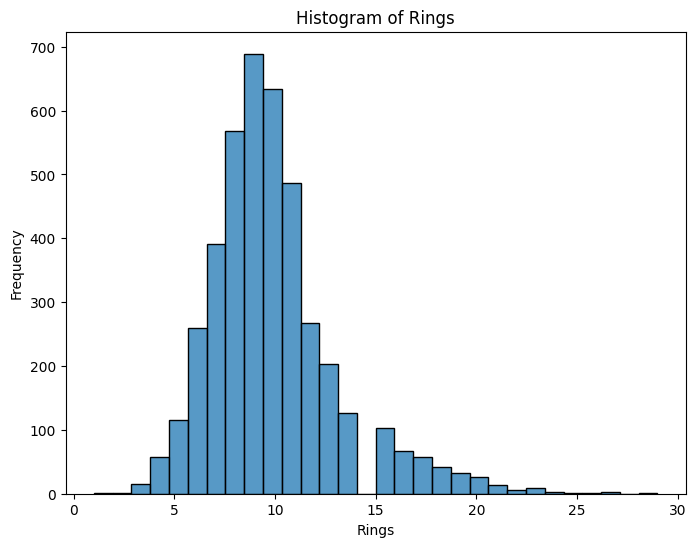

In [ ]:
# Example: Histogram of the 'Rings' column
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='Rings', bins=30)
plt.title('Histogram of Rings')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.show()

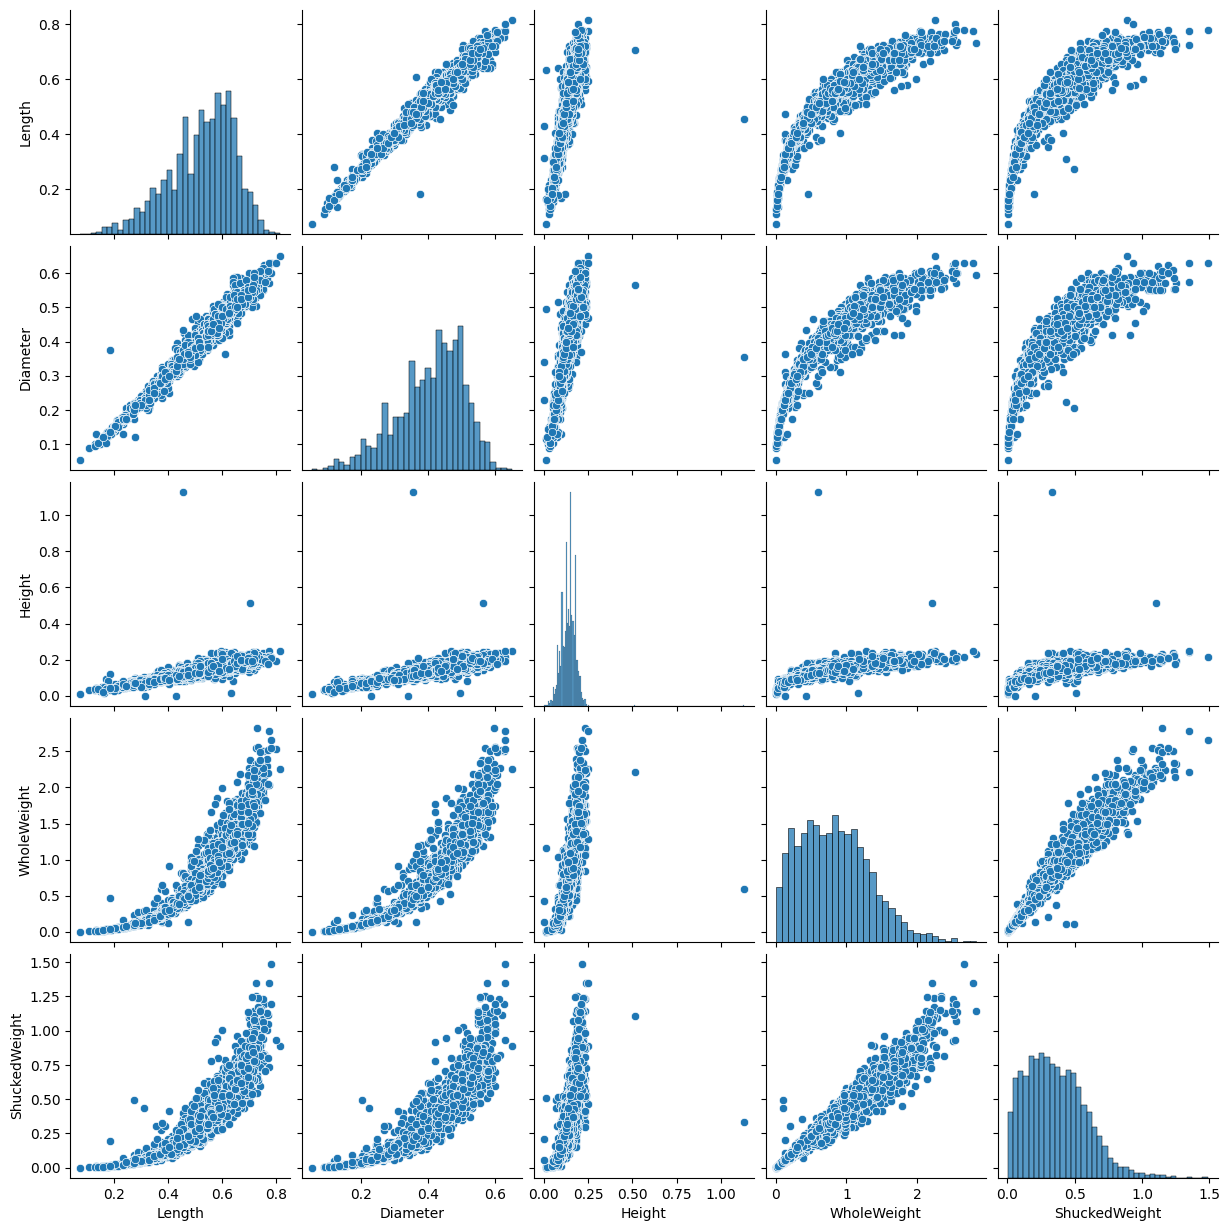

In [ ]:
# Select The Numeric Coloumns
#Pairplot
numeric_columns_subset = dataset[['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight']]

sns.pairplot(numeric_columns_subset)
plt.show()

In [ ]:
# Check for missing values
missing_values = dataset.isna().sum()
print(missing_values)


Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64


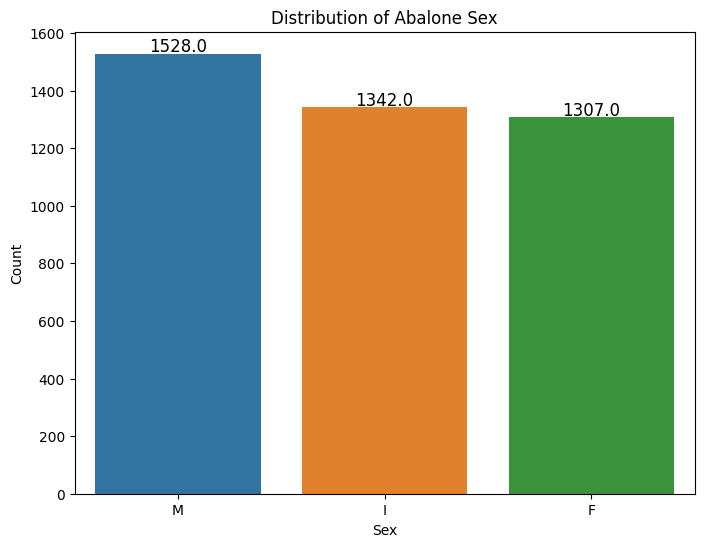

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sex_counts = dataset['Sex'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sex_counts.index, y=sex_counts.values)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Abalone Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


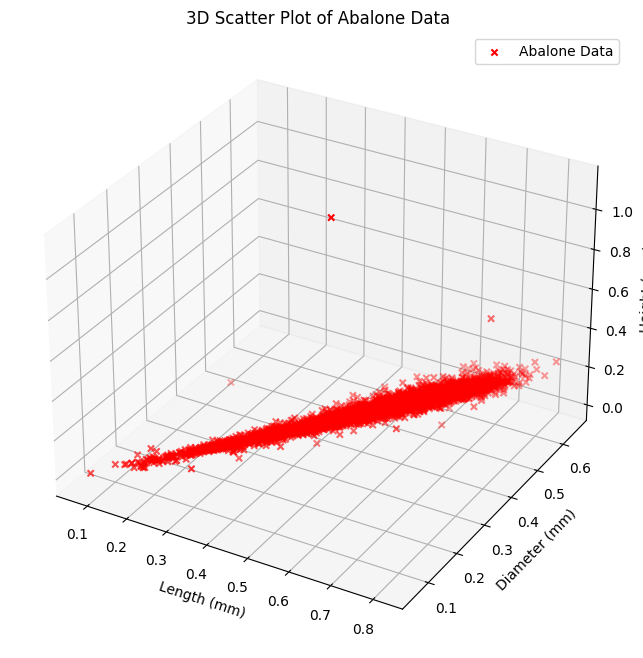

In [ ]:
# Create a 3D scatter plot for 'Length', 'Diameter', and 'Height'
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


x = dataset['Length']
y = dataset['Diameter']
z = dataset['Height']


ax.scatter(x, y, z, c='r', marker='x', label='Abalone Data')


ax.set_xlabel('Length (mm)')
ax.set_ylabel('Diameter (mm)')
ax.set_zlabel('Height (mm)')


ax.set_title('3D Scatter Plot of Abalone Data')


ax.legend()


plt.show()

<ipython-input-9-3dae7ef62b36>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


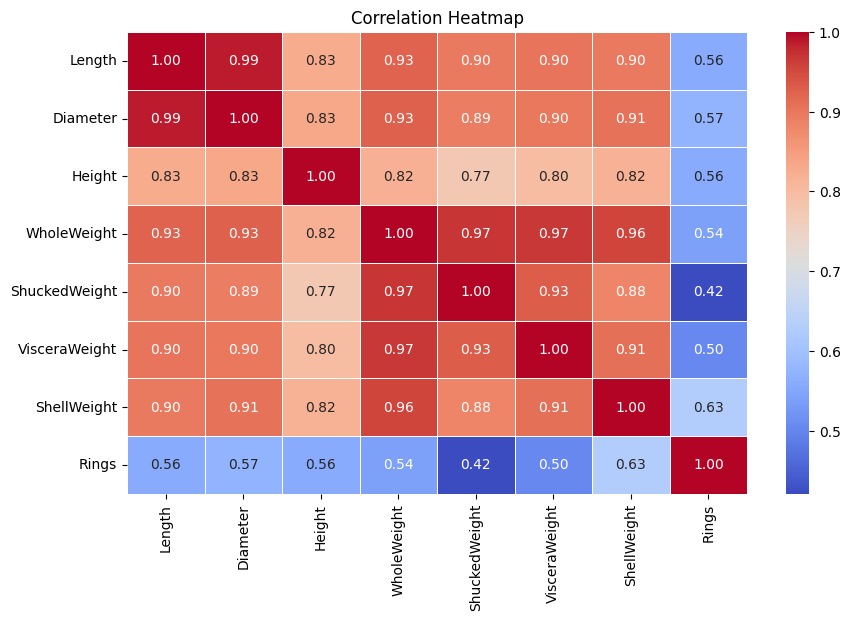

In [ ]:
# correlation matrix

correlation_matrix = dataset.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
class_counts = dataset['Rings'].value_counts()
class_counts

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [ ]:
#Keeping Only the 4 Classes

top_n_classes = 4
class_counts = dataset['Rings'].value_counts()
top_n_classes = class_counts.head(top_n_classes).index.tolist()
dataset['NewClass'] = dataset['Rings'].apply(lambda x: x if x in top_n_classes else 'Other')

dataset2 = dataset[dataset['NewClass'] != 'Other']

dataset2.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,NewClass
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,10
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,8
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,9
11,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10,10


In [ ]:

columns_to_delete = ['Sex', 'Rings']
dataset2 = dataset2.drop(columns=columns_to_delete)


dataset2.rename(columns={'NewClass': 'Rings'}, inplace=True)

dataset2.head()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
11,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Define the numeric columns to be scaled (excluding non-numeric columns)
numeric_columns = dataset2.select_dtypes(include=['number']).columns

# Fit and transform the scaler to the selected columns
dataset2[numeric_columns] = scaler.fit_transform(dataset2[numeric_columns])


In [ ]:
dataset2.head()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
2,-0.259112,-0.150976,-0.304378,-0.531138,-0.725061,-0.585711,-0.382014,9
3,-1.250000,-0.887498,-0.576999,-0.909780,-0.925226,-0.867437,-0.880622,10
5,-1.415148,-1.757932,-1.394863,-1.296654,-1.288942,-1.241365,-1.197918,8
8,-0.864655,-0.820541,-0.576999,-0.925067,-0.920344,-0.882804,-0.789966,9
11,-1.360099,-1.088367,-0.985931,-1.168480,-1.159566,-1.205509,-1.061934,10


In [ ]:
class KNN:
    import numpy as np
    from scipy import stats

    def __init__(self, k):
      self.k = k


    def fit(self, X_train, y_train):
      self.X_train = X_train
      self.y_train = y_train

    def predict(self, X_test):
        m = self.X_train.shape[0]
        n = X_test.shape[0]
        y_pred = []

        # Calculating distances
        for i in range(n):
            import numpy as np
            from scipy import stats
            distance = []

            for j in range(m):
              d = (np.sqrt(np.sum(np.square(X_test.iloc[i,:].values - self.X_train.iloc[j,:].values))))  # Euclidean distance
              distance.append((d, y_train[j]))

            distance = sorted(distance)

            # Getting k nearest neighbors
            neighbors = []
            for item in range(self.k):
                neighbors.append(distance[item][1])  # appending K nearest neighbors

            # Making predictions
            mode_result = stats.mode(neighbors)
            mode_value = mode_result.mode

            y_pred.append(mode_value)
        return y_pred

In [ ]:
X = dataset2.drop(columns=['Rings'])
y = dataset2['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1902, 7), (1902,), (476, 7), (476,))

In [ ]:
# Create a label encoder
label_encoder = LabelEncoder()

# Encode the target labels
y = label_encoder.fit_transform(y)


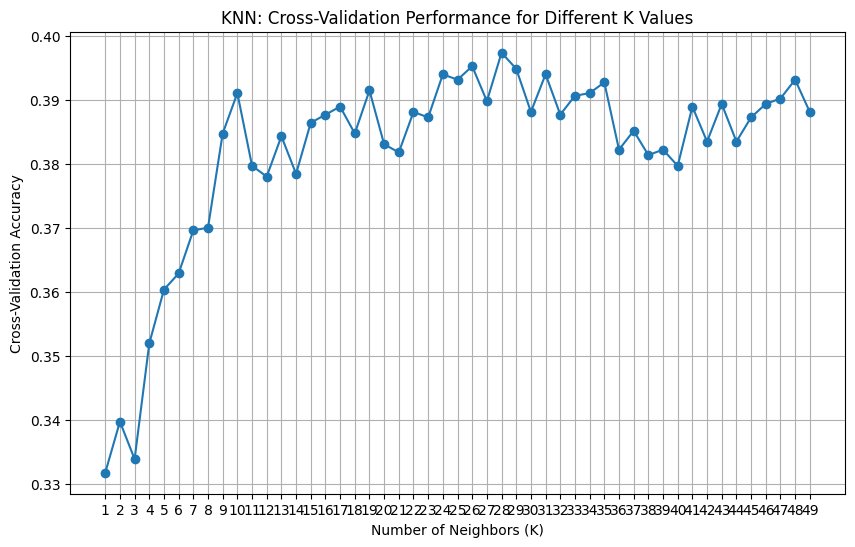

Optimal K value based on cross-validation: 28


In [ ]:
# Create lists to store K values and corresponding cross-validation scores
k_values = list(range(1, 50))  # Choose a range of K values to explore
cv_scores = []

# Perform cross-validation for each K value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Plot the cross-validation scores for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.title('KNN: Cross-Validation Performance for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the optimal K value based on the elbow point
optimal_k = k_values[np.argmax(cv_scores)]
print(f'Optimal K value based on cross-validation: {optimal_k}')

In [ ]:
knn = KNN(k=28)
# model fitting
knn.fit(X_train, y_train)

# predicting

y_train_series = pd.Series(y_train)
y_train_series = y_train_series.reset_index(drop=True)
y_train = y_train_series.values


y_pred = knn.predict(X_test)

In [ ]:

y_test_series = pd.Series(y_test)
y_test_series = y_test_series.reset_index(drop=True)
y_test = y_test_series.to_numpy(dtype=int)

y_test = y_test.astype(int)
y_pred = np.array(y_pred)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 36.34%


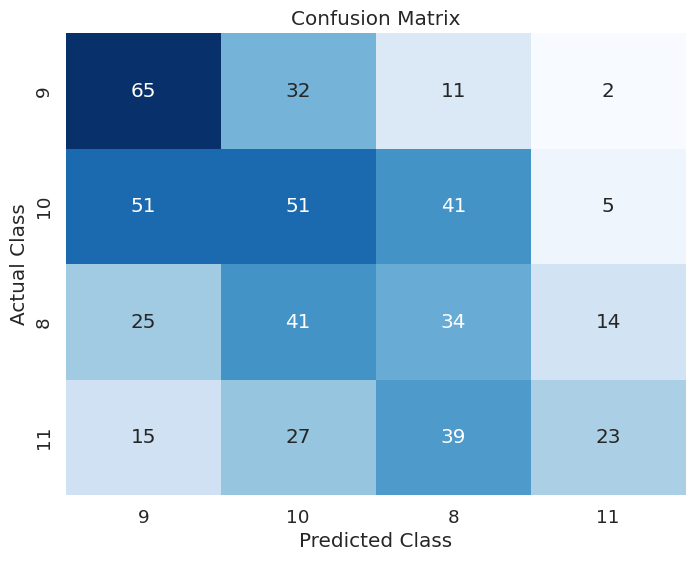

In [ ]:
class_labels = dataset2['Rings'].unique()
confusion = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()
